# **Neurons and Neural Networks**
![title](title.jpg)
_(c)Andrey K. 2024_

## This is a general structure of a biological neuron cell

<div><img src='neuron-diagram.jpg' width=600 /></div>


## This is the concept of operation - input, processing, output

<div><img src='activation-functions.jpg' width=600 /></div>

## How activity looks like

<div><img src='live_neuron_stages.png' width=400 /></div>

## Artificial neuron

![perceptron](Single-Neuron-Activation.svg)

### $$Y = f(b+ \sum_i{x_i \cdot w_i})$$

### Neuron Processing Flow

1. summ up all the inputs with their respective weights
2. add bias
3. apply activation function to determine output

### Activation functions (tiny subset)

![Activation Functions](activation_functions.png)

## What can a single neuron do?

Turns out, quite a bit! (no pun intended)

### ✅ Boolean functions:

For example - AND gate

![AND](and_gate.png)


### ✅ Classifying linearly separable groups

<div><img src='pla2.png' width=300/></div>

## Single neuron limitations

### ❌ Non linear classification

<div><img src='linsep_new.png' width=500/></div>


### ❌ XOR function 

<div><img src='bitwise_datasets.png' width=500/></div>



### To solve the non linear problems we need to go beyond a single neuron


## Neural Network

interconnected layers of neurons that send signals from one to another

![ann](ann.png)

$$ Neural Network$$

## Signal flow in a neural network

### **Bilogical network**

![Flow](signal_flow.png)

### **Artificial network**

![Topology](topology.jpg)

### **Side by side**

![network](network.png)


# LEARNING & INFERENCE

## INFERENCE - Feed Forward

What we have seen about a single neuron can be applied to a network. 

Imagine that each layer stands on its own, and output of each prior layer serves as input to the next layer:

so let's say we have three inputs for layer one: $X_{L1}=(x_1, x_2, x_3) $

weights:$W_{L1}=(w_1, w_2, w_3) $ 

bias: $b_1$

activation: $tanh$

outputs: $y = tanh( X_{L1} \cdot W_{L1} + b_1) $

$ y = tanh(x_1 * w_1 + x_2 * w_2 + x_3 * w_3 + b_1) $

let's look at an example:

In [31]:
import numpy as np
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split  
from matplotlib import pyplot as plt
%matplotlib inline

(600, 2) (600, 2) (600,) (600,)
inputs:
 [[ 1.00711354 -0.49463213]
 [ 1.18230616 -0.24572636]
 [-0.11326634  0.89753552]
 [ 0.80133308  0.35656132]
 [ 1.64168911  0.2958033 ]] 
...
classes:
 [1 1 0 0 1]


Text(0.5, 1.0, 'Two Moons')

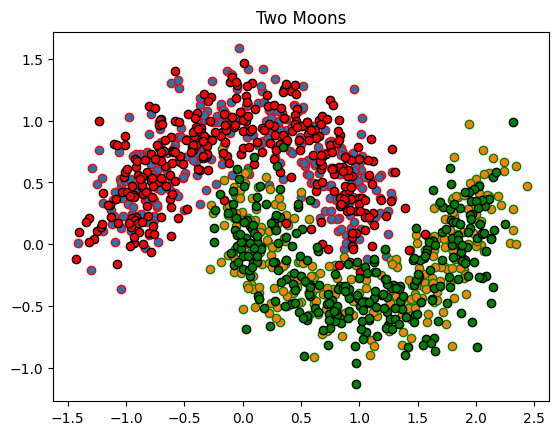

In [48]:
#
# Generate a dataset and plot it
#
np.random.seed(0)
X_full, y_full = datasets.make_moons(1200, noise=0.20)
sets = train_test_split(X_full, y_full, test_size=0.5)
print(sets[0].shape, sets[1].shape, sets[2].shape, sets[3].shape)
X = sets[0]
X_test = sets[1]
y = sets[2]
y_test = sets[3]
print('inputs:\n',X[:5,:],'\n...')
print('classes:\n',y[:5])
plt.scatter(X[y==0,0],X[y==0,1],edgecolors='r')
plt.scatter(X[y==1,0],X[y==1,1],edgecolors='g')
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1],c='r',edgecolors='k')
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1],c='g',edgecolors='k')

plt.title('Two Moons')

## Let's build a simple neural network

it will have one input layer (2 neurons for the (x,y) coordinates of each point)
two hidden layers with 6 neurons each
and a single output
the output will try to predict if a point belongs to moon 0 or moon 1
<div>
    <img src='net_structure.png' width='500'/>
</div>


In [49]:
cls = MLPClassifier(hidden_layer_sizes=(6,6),activation='logistic', solver='lbfgs',learning_rate_init=0.15, max_iter=1000, random_state=1)
cls.fit(X, y)
pred_classes = cls.predict(X)

Text(0.5, 1.0, 'Performance on training data')

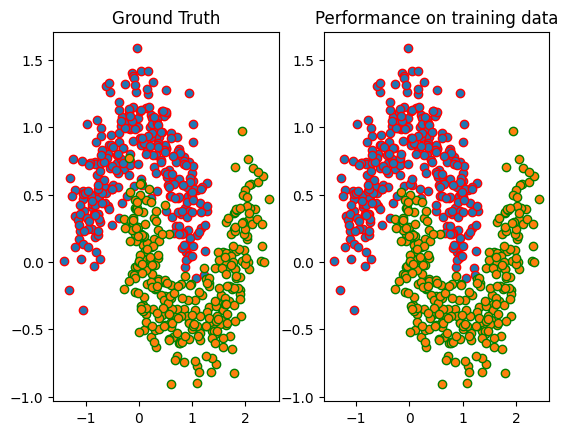

In [52]:
plt.subplot(1,2,1)
plt.scatter(X[y==0,0],X[y==0,1],edgecolors='r')
plt.scatter(X[y==1,0],X[y==1,1],edgecolors='g')
plt.title('Ground Truth')
plt.subplot(1,2,2)
plt.scatter(X[pred_classes==0,0],X[pred_classes==0,1],edgecolors='r')
plt.scatter(X[pred_classes==1,0],X[pred_classes==1,1],edgecolors='g')
plt.title('Performance on training data')

## Let's run through our trained network manually 

This time we will use the test data - the data that the network haven't seen before, and see how well it performs

(600, 2) (600,)


Text(0.5, 1.0, 'Test Data')

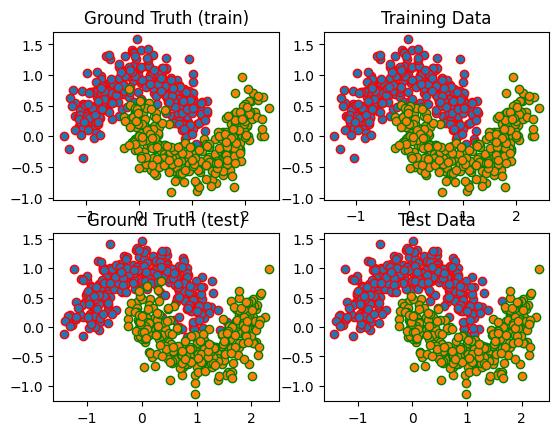

In [55]:
W1 = cls.coefs_[0]
W2 = cls.coefs_[1]
W3 = cls.coefs_[2]
b1 = cls.intercepts_[0]
b2 = cls.intercepts_[1]
b3 = cls.intercepts_[2]
testX = np.array([[0,-0.5] ])

sigmoid = lambda x: 1.0/(1.0+np.exp(-x))
softmax = lambda x: np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

l1 = sigmoid( X_test.dot(W1)+b1)
l2 = sigmoid(l1.dot(W2) + b2)
l3 = sigmoid(l2.dot(W3) + b3)
out_class = np.zeros(l3.shape[0])
out_class[l3[:,0] > 0.5] = 1

print(X_test.shape, out_class.shape)
plt.subplot(2,2,1)
plt.scatter(X[y==0,0], X[y==0,1],edgecolors='r')
plt.scatter(X[y==1,0], X[y==1,1],edgecolors='g')
plt.title('Ground Truth (train)')
plt.subplot(2,2,2)
plt.scatter(X[pred_classes==0,0],X[pred_classes==0,1],edgecolors='r')
plt.scatter(X[pred_classes==1,0],X[pred_classes==1,1],edgecolors='g')
plt.title('Training Data')
plt.subplot(2,2,3)
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1],edgecolors='r')
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1],edgecolors='g')
plt.title('Ground Truth (test)')
plt.subplot(2,2,4)
plt.scatter(X_test[out_class==0,0],X_test[out_class==0,1],edgecolors='r')
plt.scatter(X_test[out_class==1,0],X_test[out_class==1,1],edgecolors='g')
plt.title('Test Data')